In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.fft import fft, ifft, fftfreq
import scipy

# 1.

In [2]:
def get_cos_singal(f=[50,150,450], fs=10000, A=2.0, a=-0.1, b=0.1, noise=None):
    t = np.linspace(a, b, fs)
    omegas = [2 * np.pi * f_curr for f_curr in f]
    x_cos = np.sum([A * np.cos(omega * t) for omega in omegas], axis=0)
    if noise:
        for i in range(len(x_cos)):
            x_cos[i] += (np.random.rand() * noise)
    return x_cos

In [3]:
def get_impulse(a=0.0, b=20.0, A=1, period=7.5, fc = 10_000):
    t = np.linspace(a, b, fc)
    return t, np.array([(A if ti % (period * 2) >= period else 0) for ti in t])

# 2.

In [4]:
def butter_down_filter(freqs, cutoff):
    omega = 2 * np.pi * freqs / cutoff
    H = 1 / (-omega**2 + 1j * np.sqrt(2) * omega + 1)
    return H

In [5]:
fs = 10000
a = 0
b = 20
t = np.linspace(a, b, fs)
#x_cos = get_cos_singal(a=a, b=b, fs=fs)
t, x_cos = get_impulse(a=a, b=b, A=1, period=0.5, fc = 10_000)

In [6]:
signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 10
H_down = butter_down_filter(frequencies, cutoff)
filtred_signal_fft = signal_fft * np.abs(H_down)
filtred_signal = ifft(filtred_signal_fft)

c:\Users\Ivan K\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Ivan K\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 500.0)

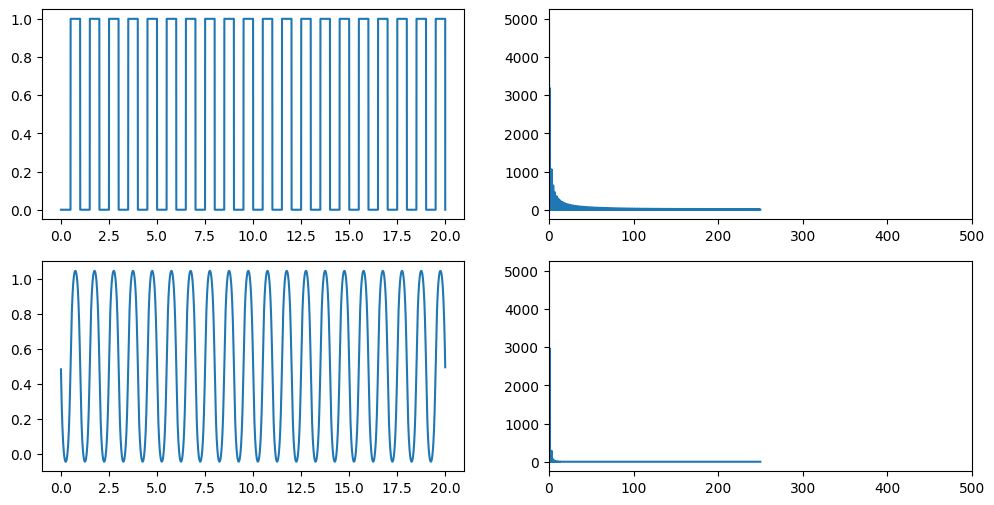

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t, x_cos)

plt.subplot(2, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

plt.subplot(2, 2, 3)
plt.plot(t, filtred_signal)

plt.subplot(2, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)

# 3.

In [8]:
x_cos_50_450 = get_cos_singal(f=[50, 450], fs=10000, A=2.0, a=-0.1, b=0.1)
signal_fft = fft(x_cos_50_450)
frequencies = fftfreq(len(x_cos_50_450), d=t[1] - t[0])
cutoff = 100
H_down = butter_down_filter(frequencies, cutoff)
filtred_signal_fft = signal_fft * np.abs(H_down)
filtred_signal = ifft(filtred_signal_fft)

(0.0, 500.0)

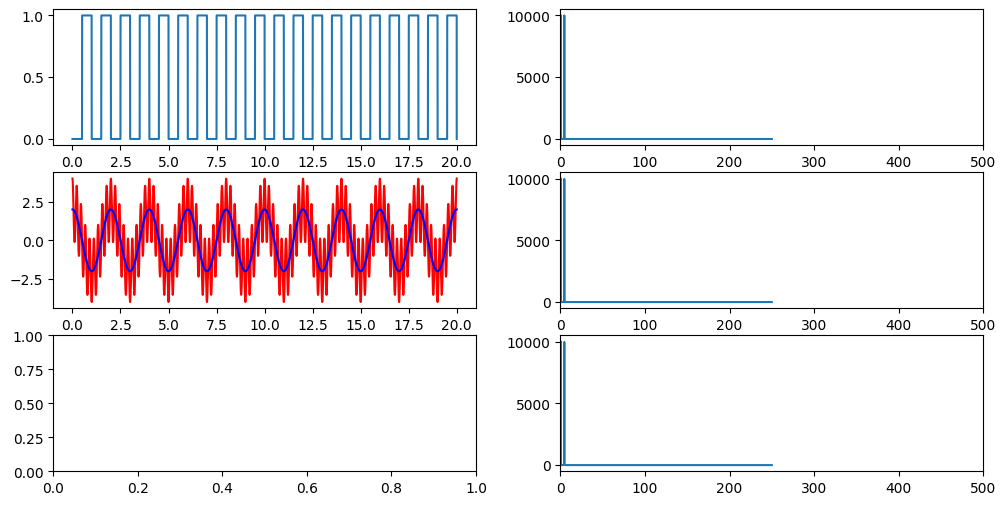

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 2, 1)
plt.plot(t, x_cos)

plt.subplot(3, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

cos_50 = get_cos_singal(f=[50])
plt.subplot(3, 2, 3)
plt.plot(t, filtred_signal, color='red')
plt.plot(t, cos_50, color='blue')


plt.subplot(3, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)



plt.subplot(3, 2, 5)


plt.subplot(3, 2, 6)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)

# 4.

In [10]:
def butter_up_filter(freqs, cutoff):
    omega = np.where(freqs != 0, 2 * np.pi * cutoff / freqs, 50000)
    H = 1 / (omega**2 + 1j * np.sqrt(2) * omega + 1)
    return H

In [11]:
fs = 10000
a = -0.1
b = 0.1
t = np.linspace(a, b, fs)
x_cos = get_cos_singal(a=a, b=b, fs=fs)

In [12]:
signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 100
H_up = butter_up_filter(frequencies, cutoff)
filtred_signal_fft = signal_fft * np.abs(H_up)
filtred_signal = ifft(filtred_signal_fft)

C:\Users\Ivan K\AppData\Local\Temp\ipykernel_12652\3747560740.py:2: RuntimeWarning: divide by zero encountered in divide
  omega = np.where(freqs != 0, 2 * np.pi * cutoff / freqs, 50000)


(0.0, 500.0)

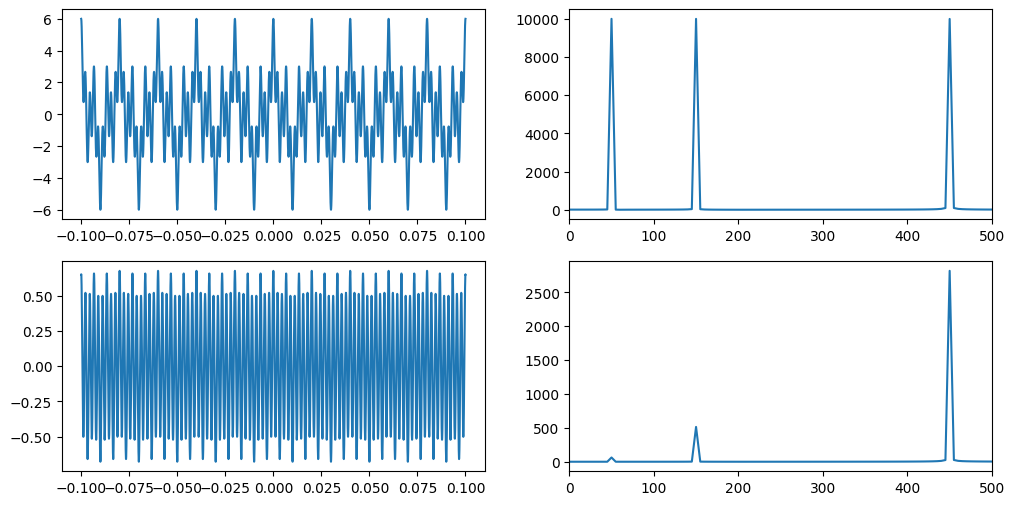

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t, x_cos)

plt.subplot(2, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

plt.subplot(2, 2, 3)
plt.plot(t, filtred_signal)

plt.subplot(2, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)

# 5.

In [14]:
cutoff = 150
H_down = butter_down_filter(frequencies, cutoff)
H_up = butter_up_filter(frequencies, cutoff)
H_bp = H_down * H_up
H_st = H_down + H_up

C:\Users\Ivan K\AppData\Local\Temp\ipykernel_12652\3747560740.py:2: RuntimeWarning: divide by zero encountered in divide
  omega = np.where(freqs != 0, 2 * np.pi * cutoff / freqs, 50000)


In [15]:
fs = 10000
a = -0.1
b = 0.1
t = np.linspace(a, b, fs)
x_cos = get_cos_singal(a=a, b=b, fs=fs)

In [16]:
signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])

filtred_signal_fft_bp = signal_fft * H_bp
filtred_signal_bp = ifft(filtred_signal_fft_bp)

filtred_signal_fft_st = signal_fft * H_st
filtred_signal_st = ifft(filtred_signal_fft_st)

(0.0, 500.0)

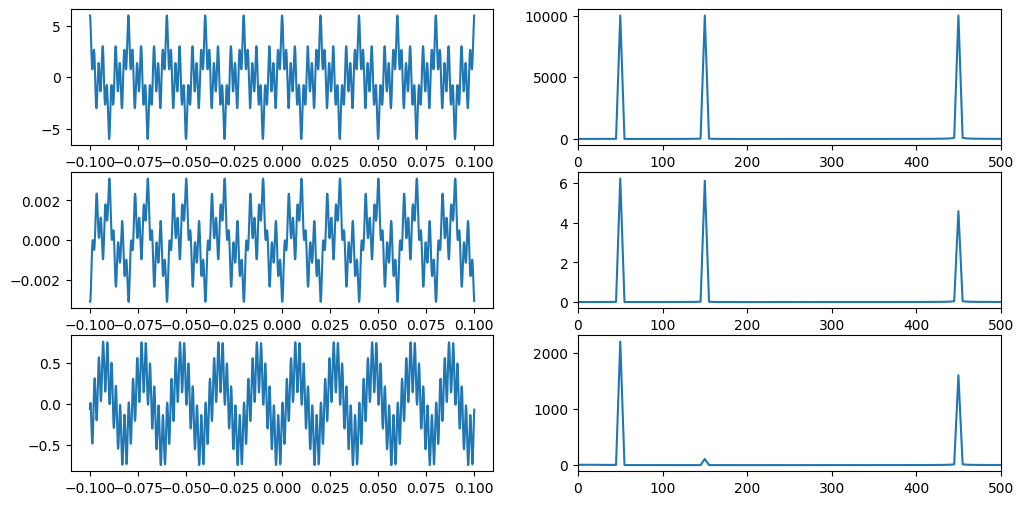

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 2, 1)
plt.plot(t, x_cos)

plt.subplot(3, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

plt.subplot(3, 2, 3)
plt.plot(t, filtred_signal_bp)

plt.subplot(3, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft_bp[:fs//2]))
plt.xlim(0, 500)

plt.subplot(3, 2, 5)
plt.plot(t, filtred_signal_st)

plt.subplot(3, 2, 6)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft_st[:fs//2]))
plt.xlim(0, 500)

# 6. 7.

In [18]:
def butter_get_S(order):
    k = np.arange(1, order + 1)
    poles = -np.exp(1j * ((2 * k - 1) * np.pi / (2 * order)))
    return poles

In [19]:
def butter_filter_order(freqs, cutoff, order):
    poles = butter_get_S(order)
    S = freqs / cutoff
    H = np.ones_like(S, dtype=complex)
    for p in poles:
        H *= 1 / (S + p)
    return H

In [20]:
fs = 10000
a = -0.1
b = 0.1
t = np.linspace(a, b, fs)
x_cos = get_cos_singal(a=a, b=b, fs=fs)

In [21]:
%time butter_filter_order(frequencies, cutoff, 12)
%time butter_filter_order(frequencies, cutoff, 2)

CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns


array([-1.        -1.00875766e-16j, -0.99888788+4.71356799e-02j,
       -0.99553679+9.42696147e-02j, ..., -0.98990305-1.41393080e-01j,
       -0.99553679-9.42696147e-02j, -0.99888788-4.71356799e-02j])

(0.0, 500.0)

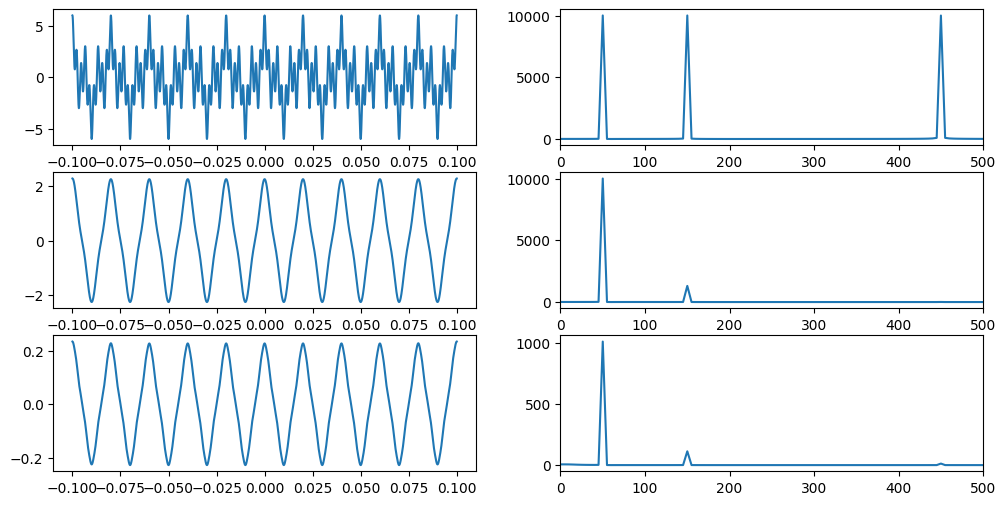

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 2, 1)
plt.plot(t, x_cos)

plt.subplot(3, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 100
H = butter_filter_order(frequencies, cutoff, 5)
filtred_signal_fft = signal_fft * np.abs(H)
filtred_signal = ifft(filtred_signal_fft)

plt.subplot(3, 2, 3)
plt.plot(t, filtred_signal)

plt.subplot(3, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)

signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 100
H_down = butter_down_filter(frequencies, cutoff)
filtred_signal_fft = signal_fft * np.abs(H_down)
filtred_signal = ifft(filtred_signal_fft)

plt.subplot(3, 2, 5)
plt.plot(t, filtred_signal)

plt.subplot(3, 2, 6)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)


# 8.

In [23]:
fs = 10000
a = -0.1
b = 0.1
t = np.linspace(a, b, fs)
x_cos = get_cos_singal(a=a, b=b, fs=fs)

In [24]:
signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])

filtred_signal_fft_bp = signal_fft * H_bp
filtred_signal_bp = ifft(filtred_signal_fft_bp)

filtred_signal_fft_st = signal_fft * H_st
filtred_signal_st = ifft(filtred_signal_fft_st)

(0.0, 500.0)

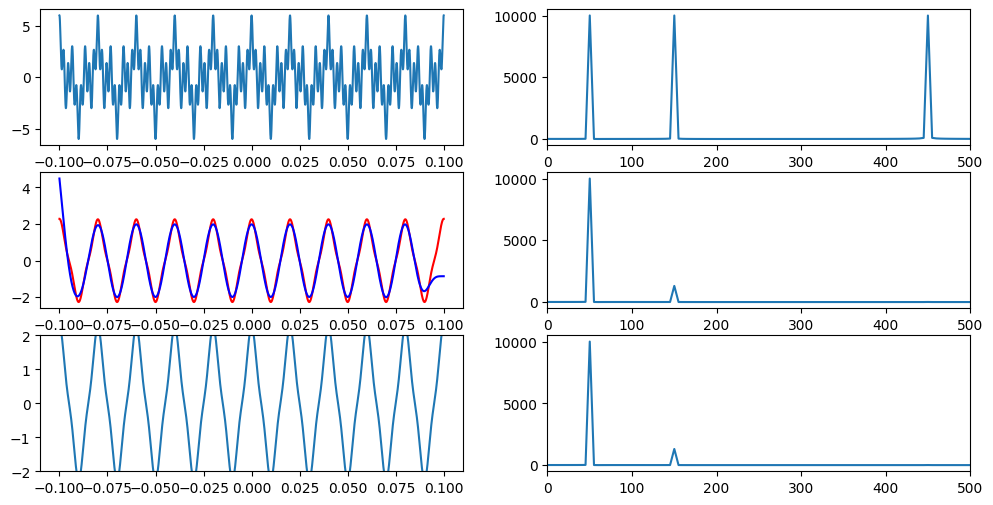

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 2, 1)
plt.plot(t, x_cos)

plt.subplot(3, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 100
H = butter_filter_order(frequencies, cutoff, 5)
filtred_signal_fft = signal_fft * np.abs(H)
filtred_signal = ifft(filtred_signal_fft)

b, a = scipy.signal.butter(5, 100 / (fs * np.pi), btype='low')
filtred_signal_scipy = scipy.signal.filtfilt(b, a, x_cos)

plt.subplot(3, 2, 3)
plt.plot(t, filtred_signal, color = 'red')
plt.plot(t, filtred_signal_scipy, color = 'blue')

plt.subplot(3, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)

b, a = scipy.signal.butter(5, 100 / (fs * np.pi), btype='low')
filtred_signal_scipy = scipy.signal.filtfilt(b, a, x_cos)
filtred_signal_fft = fft(filtred_signal)

plt.subplot(3, 2, 5)
plt.plot(t, filtred_signal)
plt.ylim(-2, 2)

plt.subplot(3, 2, 6)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)


# 9.

In [26]:
fs = 10000
a = -0.1
b = 0.1
t = np.linspace(a, b, fs)
x_cos = get_cos_singal(a=a, b=b, fs=fs, noise=1)

(0.0, 500.0)

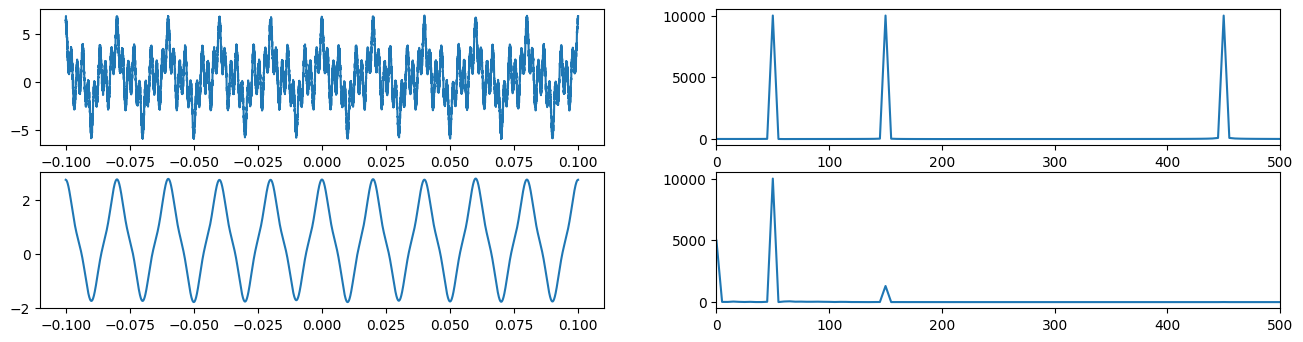

In [27]:
plt.figure(figsize=(16, 6))

plt.subplot(3, 2, 1)
plt.plot(t, x_cos)

plt.subplot(3, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 100
H = butter_filter_order(frequencies, cutoff, 5)
filtred_signal_fft = signal_fft * np.abs(H)
filtred_signal = ifft(filtred_signal_fft)

plt.subplot(3, 2, 3)
plt.plot(t, filtred_signal)

plt.subplot(3, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)

# 10

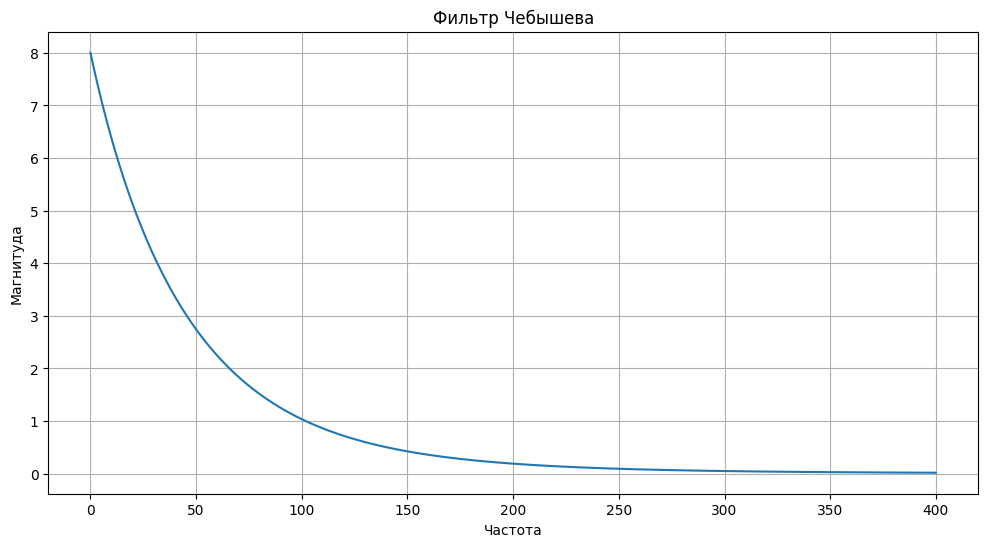

In [28]:
def chebyshev_pol(order, eps):
    k = np.arange(1, order + 1)
    beta = (1 / order) * np.arcsinh(1 / eps)
    theta = (2 * k - 1) * np.pi / (2 * order)
    pol = -np.sinh(beta) * np.sin(theta) + 1j * np.cosh(beta) * np.cos(theta)
    return pol

# Передаточная функция для ФНЧ Чебышева 1-го рода
def chebyshev_transfer_function(frequencies, wc, order, eps):
    pol = chebyshev_pol(order, eps)
    S = frequencies / wc
    H = np.ones_like(S, dtype=complex)
    for p in pol:
        H *= 1 / (S - p)
    return H

# Параметры фильтра
order = 5
wc = 200
epsilon = 0.5

# Частоты для анализа
frequencies = np.linspace(0, 2 * wc, 1000)  # Частоты от 0 до 2 * wc

# Построение передаточной функции
H_w_chebyshev = chebyshev_transfer_function(frequencies, wc, order, epsilon)

# Вычисление амплитуды частотной характеристики
mag = np.abs(H_w_chebyshev)

# Визуализация частотной характеристики
plt.figure(figsize=(12, 6))
plt.plot(frequencies, mag)  # Логарифмическое масштабирование для удобства
plt.title('Фильтр Чебышева')
plt.xlabel('Частота')
plt.ylabel('Магнитуда')
plt.grid(True)
plt.show()

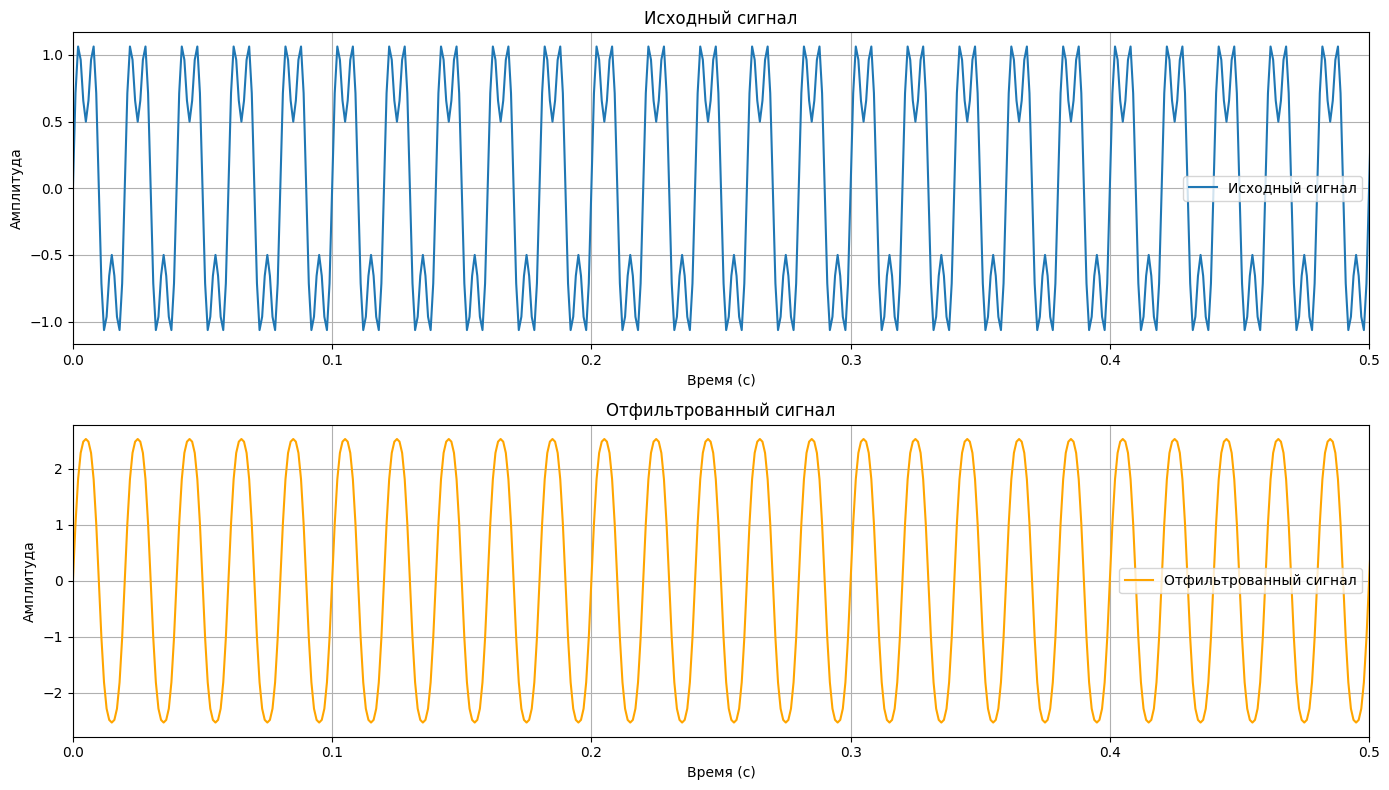

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для фильтрации сигнала через частотную характеристику
def apply_filter(signal, sampling_rate, frequencies, transfer_function):
    signal_fft = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    
    transfer_function_interp = np.interp(np.abs(freqs), frequencies, transfer_function)
    
    filtered_signal_fft = signal_fft * transfer_function_interp
    
    filtered_signal = np.fft.ifft(filtered_signal_fft).real
    return filtered_signal

sampling_rate = 1000  # Гц
t = np.linspace(0, 1, sampling_rate, endpoint=False) 
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 150 * t) 

mag = np.abs(H_w_chebyshev)

filtered_signal = apply_filter(signal, sampling_rate, frequencies, mag)

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Исходный сигнал')
plt.title('Исходный сигнал')
plt.xlabel('Время (с)')
plt.xlim(0, 0.5)
plt.ylabel('Амплитуда')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', color='orange')
plt.title('Отфильтрованный сигнал')
plt.xlabel('Время (с)')
plt.xlim(0, 0.5)
plt.ylabel('Амплитуда')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
